# Lab Exercise 2 
Parin Patel
IST- 718 

## Objective: 

The goal of this lab is to predict which zip codes provide the best investment. We wanted to narrow down our choices to the best three locations. 

We will be using the base data provided by Zillow to answer the following questions:
    - What techniques/algorthims were used. and why? 
    

In [1]:
pip install pmdarima 

  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
Note: you may need to restart the kernel to use updated packages.


tables 3.5.1 requires mock>=2.0, which is not installed.


In [2]:
import pandas as pd
from datetime import datetime
from numpy import round
from numpy import nan
import numpy as np
import pmdarima as pm 

### Load Data:
Housing data is from the following link:  http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv

In [3]:
import os
os.getcwd()

'C:\\Users\\parin\\Documents\\IST718'

In [4]:
#housedf = pd.read_csv("/Users/parinpatel/Documents/IST718/Zip_Zhvi_SingleFamilyResidence.csv", encoding = "ISO-8859-1")

housedf = pd.read_csv("C:\\Users\\parin\\Documents\\IST718\\Zip_Zhvi_SingleFamilyResidence.csv", encoding = "ISO-8859-1")

housedf.fillna(0)
print("Status: Data has been uploaded successfully")


Status: Data has been uploaded successfully


## Data Pre-Processing: Importing Datasets and Cleaning

### Review  Data:

In [5]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30416 entries, 0 to 30415
Columns: 293 entries, RegionID to 2020-01
dtypes: float64(260), int64(29), object(4)
memory usage: 68.0+ MB


In [6]:
housedf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,NaN,NaN,NaN,...,1368105,1364024,1363512,1356338,1353732,1342754,1335179,1330639,1331055,1339239
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,357885.0,356600.0,356287.0,...,962066,962356,961374,962315,962400,961804,960609,959225,957716,957450
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,NaN,NaN,NaN,...,1503563,1492666,1481481,1468752,1457580,1449732,1445910,1443345,1443190,1450007
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,199238.0,198101.0,197436.0,...,336107,335852,335768,336138,336182,336256,336139,335895,335692,335059
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,537642.0,535349.0,535367.0,...,1190853,1191323,1190678,1191700,1191237,1188946,1186512,1183527,1181049,1180227


In [7]:
print(housedf.describe())


            RegionID    RegionName     SizeRank       1996-04       1996-05  \
count   30416.000000  30416.000000  30416.00000  1.353500e+04  1.362000e+04   
mean    80406.454070  48757.129373  15208.50000  1.270519e+05  1.271195e+05   
std     25516.436461  27437.208982   8780.48723  8.643089e+04  8.631113e+04   
min     58001.000000    501.000000      1.00000  1.088100e+04  1.083600e+04   
25%     68814.250000  25854.750000   7604.75000  7.140950e+04  7.152725e+04   
50%     79157.500000  48239.500000  15208.50000  1.072720e+05  1.073555e+05   
75%     89230.250000  71683.000000  22812.25000  1.584075e+05  1.587318e+05   
max    753844.000000  99901.000000  30416.00000  1.689162e+06  1.642149e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.365500e+04  1.367800e+04  1.371300e+04  1.373300e+04  1.375300e+04   
mean   1.271315e+05  1.274702e+05  1.275954e+05  1.277614e+05  1.279829e+05   
std    8.619665e+04  8.939193e+04  8.934792e+04  8.

In [8]:
print(housedf.SizeRank.describe(),'\n')


count    30416.00000
mean     15208.50000
std       8780.48723
min          1.00000
25%       7604.75000
50%      15208.50000
75%      22812.25000
max      30416.00000
Name: SizeRank, dtype: float64 



In [9]:
housedf.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01'],
      dtype='object', length=293)

#### Based on our review of the data above...

To learn more about the dataset, we will use the information provided on the Zillow data's site.  https://www.zillow.com/research/data/  

The data is about ZHVI (Zillow Home Value Index). According to the website, the ZHVI is a smoothed, seasonally adjusted measure of the typical home value and the market change across a given region and housing type. 

The data has 30,415 rows and 293 columns. Each individual row contains a region within a county in the United States. The columns "RegionName" is denoated by that regions zipcode. The first 6 columns are related to the the region/county/state/city/metron name information. In general, the raw data is sorted by in ascending order by the SizeRank column. The Zillow website does not specifically state what the parameters or definitions of this column are. It is likely that this number either is realted to the average ZHVI per square foot for that Region across all the years. It may also be related to the size of the zipcode. 


For the data types of the columns: there are  260 columns that are  float64, 29 that are int64,  and 4 columns that are object. 

The four object columns are city/state/metro/CountyName. 

### Data Cleaning:
Not much cleaning is required. We will remove the NA's and visually inspect the rows. 

In [10]:
#Remove NA's 
housedf.dropna(axis=0, how='any', inplace=True)
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12306 entries, 1 to 30392
Columns: 293 entries, RegionID to 2020-01
dtypes: float64(260), int64(29), object(4)
memory usage: 27.6+ MB


In [11]:
housedf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,357885.0,356600.0,356287.0,...,962066,962356,961374,962315,962400,961804,960609,959225,957716,957450
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,199238.0,198101.0,197436.0,...,336107,335852,335768,336138,336182,336256,336139,335895,335692,335059
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,537642.0,535349.0,535367.0,...,1190853,1191323,1190678,1191700,1191237,1188946,1186512,1183527,1181049,1180227
5,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,6,97144.0,97139.0,97111.0,...,183322,183659,184195,185078,185716,186114,186539,187215,187847,188059
7,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,8,96914.0,96872.0,96853.0,...,181107,181350,181819,182524,183052,183370,183845,184447,185036,185200


###### After dropping the NA's. - 12,306 rows remain
The number of columns remain the same. 

In [12]:
#check for null (NAN)
pd.isnull(housedf)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
housedf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,357885.0,356600.0,356287.0,...,962066,962356,961374,962315,962400,961804,960609,959225,957716,957450
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,199238.0,198101.0,197436.0,...,336107,335852,335768,336138,336182,336256,336139,335895,335692,335059
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,537642.0,535349.0,535367.0,...,1190853,1191323,1190678,1191700,1191237,1188946,1186512,1183527,1181049,1180227
5,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,6,97144.0,97139.0,97111.0,...,183322,183659,184195,185078,185716,186114,186539,187215,187847,188059
7,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,8,96914.0,96872.0,96853.0,...,181107,181350,181819,182524,183052,183370,183845,184447,185036,185200


In [14]:
print(f'Unique zip codes: {housedf.RegionName.nunique()}')

Unique zip codes: 12306


### Preliminary Analysis: 

There are 12, 306 unique zipcodes in the data:

We will now want to select zipcodes based on areas with the largest size (SizeRank). We will want to figure out first what would be the number of zipcodes if we only reviewed the top 25% - so areas with higher 

In [15]:
#Get zipcodes with a size rank in the top 25% (highly urbanized zipcodes).
print(housedf.SizeRank.describe(),'\n')

count    12306.000000
mean     10118.931009
std       7533.194442
min          2.000000
25%       3921.500000
50%       8456.500000
75%      14969.250000
max      30393.000000
Name: SizeRank, dtype: float64 



In [16]:
#Calculate the 25% cutoff value.
sr_25 = housedf.SizeRank.quantile(q=0.25)
print(f'Size Rank 25% cutoff value: {sr_25}')

#Get data frame with top 25 zipcodes. 
house_top25= housedf[housedf['SizeRank']<sr_25].drop(['RegionID','City',
                                                       'State','Metro','CountyName',
                                                       'SizeRank'],axis=1)
print(f'Amount of zipcodes: {len(house_top25)}')



Size Rank 25% cutoff value: 3921.5
Amount of zipcodes: 3077


By narrowing in to zipcodes in the top 25% - we wer eable to narrow  fown the zipcodes from 12,306 to 3,077. 

Our next steps include trying to narrow down this even further by trying to find zipcodes with average values around the median. 

In [17]:
house_top25.head()
house_top25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3077 entries, 1 to 3920
Columns: 287 entries, RegionName to 2020-01
dtypes: float64(260), int64(27)
memory usage: 6.8 MB


In [18]:
house_top25['yr_avg']=house_top25.iloc[:,-12:].mean(skipna=True, axis=1)
#Get zipcodes with an average value 15% above the median and 15% below .
print(house_top25['yr_avg'].describe(),'\n')
#Calculate the 65% cutoff value (15% above).
q_65 = house_top25['yr_avg'].quantile(q=0.65)
print(f'Average Value 65% cutoff value: {round(q_65,2)}')
#Calculate the 35% cutoff value (15% below).
q_35 = house_top25['yr_avg'].quantile(q=0.35)
print(f'Average Value 35% cutoff value: {round(q_35,2)}')

count    3.077000e+03
mean     4.026637e+05
std      3.514643e+05
min      2.325358e+04
25%      2.005301e+05
50%      2.932240e+05
75%      4.710101e+05
max      3.597905e+06
Name: yr_avg, dtype: float64 

Average Value 65% cutoff value: 378370.12
Average Value 35% cutoff value: 236137.98


In [19]:
#Get data frame with selected zipcodes.
house_pref= house_top25[(house_top25['yr_avg']<q_65) & (house_top25['yr_avg']>q_35)]
print(f'Amount of zipcodes: {len(house_pref)}')


Amount of zipcodes: 923


##### We will now try to calculate our return on investment (ROI), Coefficient of variance (CV), standard deviation (std) of all the monthly values and calculate  mean by region.

In [20]:
#Calc  return on investment
house_pref['ROI']= ((house_pref['2018-01']/house_pref['1997-01'])-1).round(4)
#Calc standard deviation of monthly housing values by zip
house_pref['std']=house_pref.loc[:,'1997-01':'2018-12'].std(skipna=True, axis=1).round(2)

#Calc  mean value by zip 
house_pref['mean']=house_pref.loc[:,'1997-01':'2018-12'].mean(skipna=True, axis=1).round(2)
#calc CV 
house_pref['CV']=(house_pref['std']/house_pref['mean']).round(4)


# New calc values in table 
house_pref[['RegionName','std','mean','ROI','CV']].head()


C:\Users\parin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\parin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\parin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

,RegionName,std,mean,ROI,CV
3,77494,41821.83,263396.67,0.6508,0.1588
12,78660,29481.17,181939.15,0.7318,0.1620
16,37013,24651.91,149792.74,0.8289,0.1646
17,32162,49722.23,194927.25,1.3518,0.2551
24,37211,36415.08,168430.45,1.2292,0.2162


In [21]:
#Review coefficients of variance.
print(house_pref.CV.describe())


count    923.000000
mean       0.232891
std        0.066670
min        0.076400
25%        0.184000
50%        0.233200
75%        0.278250
max        0.583500
Name: CV, dtype: float64


In [22]:
#Determine upper limit of CV 
upper_cv = house_pref.CV.quantile(.65)
print(f'\nCV upper limit: {upper_cv}')



CV upper limit: 0.2614


In [23]:
#Get the 5 zipcodes with best ROIs within upper limits
bestZips = house_pref[house_pref['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:5]
print(' The Top 5 Zipcodes with Highest ROI Are:')
bestZips[['RegionName','ROI','CV']]


 The Top 5 Zipcodes with Highest ROI Are:


,RegionName,ROI,CV
1699,55406,2.0763,0.2558
2667,55418,1.9857,0.2498
1166,29412,1.8807,0.2562
1025,55104,1.8205,0.2423
2961,63108,1.8029,0.2390


Issue here - we need to give these locations names....

In [24]:
#Match for Location Names
bestZipsNames = list(bestZips.RegionName.values)
for i in bestZipsNames:
    city = housedf[housedf['RegionName']==i].City.values[0]
    state = housedf[housedf['RegionName']==i].State.values[0]
    print(f'Zipcode : {i} \nLocation: {city}, {state}\n')


Zipcode : 55406 
Location: Minneapolis, MN

Zipcode : 55418 
Location: Minneapolis, MN

Zipcode : 29412 
Location: Charleston, SC

Zipcode : 55104 
Location: Saint Paul, MN

Zipcode : 63108 
Location: Saint Louis, MO



We have successfully identified that the best zipcodes to invest in are in :
 1. Minneapolis, MN
 2. Charleston, SC
 3. Saint Paul, MN
 4. Saint Louis, MO
 
 
 ** Minneapolis had two zips in the top list - 55418 and 55406
 
 
 
 We were able to ID the top 5 zipcodes by choosing zipcodes were the average home value was around the calculated median. We utilized the SizeRank column to help us narrow down the zipcodes further - we assumed that SREIT would want to invest in areas that were larger/had a larger population density. This would, in the long term, mean more liklihood of growth, job opportunities, and urbanization. We finally calculated our ROI for each zip code and calculated the historical mean and calculated the measure of varability for each zipcode
 

# Analysis:

Initial Data analysis: Start with with time series plot for Hot Springs, Little Rock, Fayetteville, Searcy in Arkansas from 1997 to 2020.

We developed model(s) for forecasting average median housing value by zip code for 2018 using data from 1997 to 2017 as our training data. 

### Time Series Plots: 
we will first create the individual time series plot for each of the four cities in Arkansas. And then combine them into one plot. 

For each cities plot, we will first find the mean of the housing market for each respective year, and then plot those means across the years. 

In [25]:
import matplotlib.pyplot as plt  # plotting series
import seaborn as sns
color = sns.color_palette()

#### Time series plot - Hot Springs, Arkansas


In [26]:
housedf.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,357885.0,356600.0,356287.0,...,962066,962356,961374,962315,962400,961804,960609,959225,957716,957450
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,199238.0,198101.0,197436.0,...,336107,335852,335768,336138,336182,336256,336139,335895,335692,335059
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,537642.0,535349.0,535367.0,...,1190853,1191323,1190678,1191700,1191237,1188946,1186512,1183527,1181049,1180227
5,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,6,97144.0,97139.0,97111.0,...,183322,183659,184195,185078,185716,186114,186539,187215,187847,188059
7,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,8,96914.0,96872.0,96853.0,...,181107,181350,181819,182524,183052,183370,183845,184447,185036,185200


C:\Users\parin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


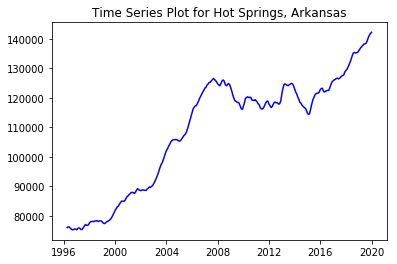

In [27]:
hotsprings = housedf.loc[(housedf['State']=='AR') & (housedf['Metro'].str.contains('Hot Springs'))]
hotspringsMean = hotsprings.iloc[:, 7:].mean(axis=0)
hotspringsMean.index = pd.to_datetime(hotspringsMean.index)
plt.plot(hotspringsMean.index, hotspringsMean.values, color='blue')
plt.title('Time Series Plot for Hot Springs, Arkansas')
plt.show()

#### Time series plot - Little Rock, Arkansas

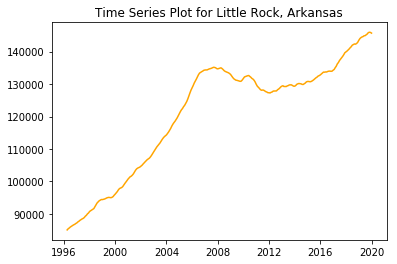

In [28]:
littlerock = housedf.loc[(housedf['State']=='AR') & (housedf['Metro'].str.contains('Little Rock'))]
littlerockMean = littlerock.iloc[:, 7:].mean(axis=0)
littlerockMean.index = pd.to_datetime(littlerockMean.index)
plt.plot(littlerockMean.index, littlerockMean.values, color='orange')
plt.title('Time Series Plot for Little Rock, Arkansas')
plt.show()

#### Time series plot - Fayetteville, Arkansas

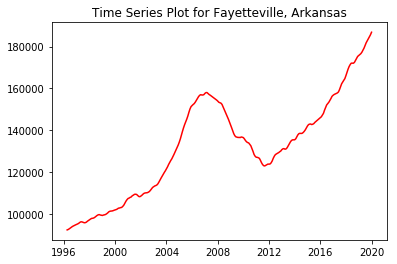

In [29]:
fayetteville = housedf.loc[(housedf['State']=='AR') & (housedf['Metro'].str.contains('Fayetteville'))]
fayettevilleMean = fayetteville.iloc[:, 7:].mean(axis=0)
fayettevilleMean.index = pd.to_datetime(fayettevilleMean.index)
plt.plot(fayettevilleMean.index, fayettevilleMean.values, color='red')
plt.title('Time Series Plot for Fayetteville, Arkansas')
plt.show()

#### Time series plot - Searcy, Arkansas

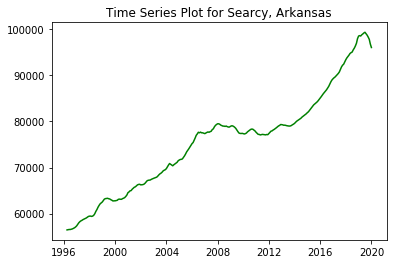

In [30]:
searcy = housedf.loc[(housedf['State']=='AR') & (housedf['Metro'].str.contains('Searcy'))]
searcyMean = searcy.iloc[:, 7:].mean(axis=0)
searcyMean.index = pd.to_datetime(searcyMean.index)
plt.plot(searcyMean.index, searcyMean.values, color='green')
plt.title('Time Series Plot for Searcy, Arkansas')
plt.show()

#### Merged Time Series Plot for 4 Cities in Arkansas:

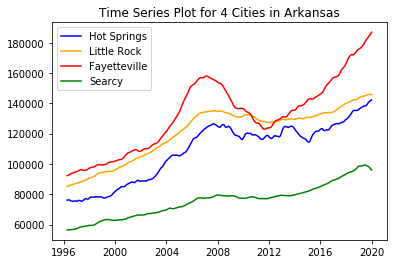

In [31]:
plt.plot(hotspringsMean.index, hotspringsMean.values, color='blue', label='Hot Springs')
plt.plot(littlerockMean.index, littlerockMean.values, color='orange', label='Little Rock')
plt.plot(fayettevilleMean.index, fayettevilleMean.values, color='red', label='Fayetteville')
plt.plot(searcyMean.index, searcyMean.values, color='green', label='Searcy')
plt.title('Time Series Plot for 4 Cities in Arkansas')
plt.legend()



plt.show()

### Mean Housing Prices Per Cities in US

In [181]:
years = housedf.loc[:,'1997-01':'2018-01']
city_years = years
city_years = city_years.assign(city=housedf.City)
city_MeanPrice = pd.melt(city_years, id_vars='city', var_name='month', value_name='price').groupby('city', as_index=False).agg({"price": "mean"})
city_MeanPrice = pd.DataFrame(city_MeanPrice)

city_MeanPrice.head()

,city,price
0,Abbeville,95643.300395
1,Abell,272249.079051
2,Aberdeen,152170.259552
3,Abernathy,65937.403162
4,Abingdon,222859.521739


In [182]:
city_MeanPrice=city_MeanPrice.round({"price":2}) 
city_MeanPrice=city_MeanPrice.sort_values(by='price', ascending=False)

In [183]:
city_MeanPrice['price'] = city_MeanPrice['price'].astype(np.int64)
city_MeanPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6434 entries, 188 to 1510
Data columns (total 2 columns):
city     6434 non-null object
price    6434 non-null int64
dtypes: int64(1), object(1)
memory usage: 150.8+ KB


In [184]:
top10Cities=city_MeanPrice.nlargest(10,'price')
top10Cities.info()
top10Cities.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 188 to 4081
Data columns (total 2 columns):
city     10 non-null object
price    10 non-null int64
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


,city,price
188,Aspen,3062168
4068,Palm Beach,2647894
4720,Sagaponack,2503017
198,Atherton,2192921
4351,Portola Valley,1819188


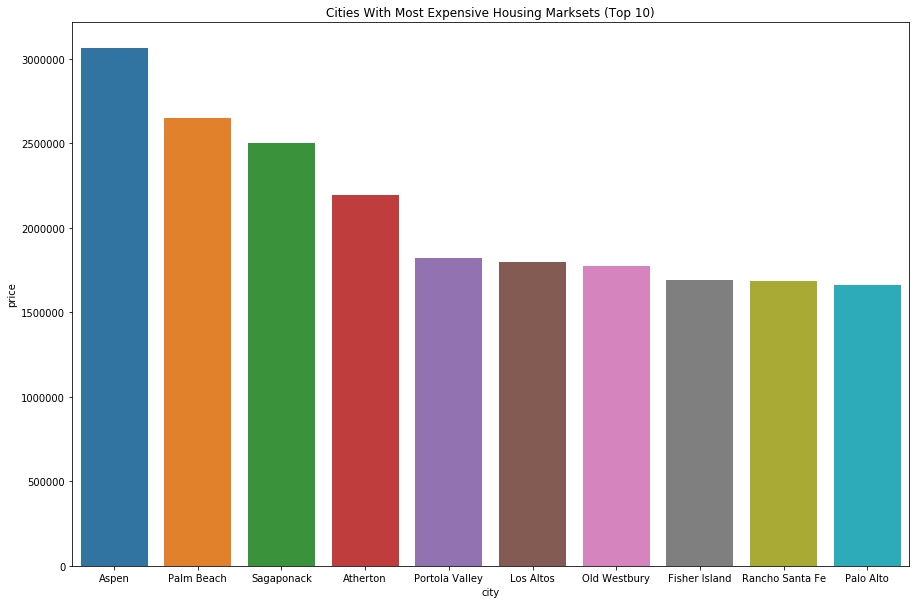

In [185]:
plt.figure(figsize=(15,10))
sns.barplot(x="city", y='price', data=top10Cities, label="Total")
plt.title('Cities With Most Expensive Housing Marksets (Top 10)')
#sns.set(font_scale=1.25)  # crazy big



plt.show()

In [186]:
years = housedf.loc[:,'1997-01':'2018-01']
state_years = years
state_years = state_years.assign(state=housedf.State)
state_yearsPrice = pd.melt(state_years, id_vars='state', var_name='month', value_name='price').groupby('state', as_index=False).agg({"price": "mean"})
state_yearsPrice = pd.DataFrame(state_yearsPrice)

state_yearsPrice.head()


,state,price
0,AK,278137.637276
1,AL,126065.562321
2,AR,92540.818543
3,AZ,206082.845302
4,CA,459318.446070


In [187]:
state_yearsPrice=state_yearsPrice.round({"price":2}) 
state_yearsPrice=state_yearsPrice.sort_values(by='price', ascending=False)
top15State=state_yearsPrice.nlargest(15,'price')
top15State.info()
top15State.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 7 to 30
Data columns (total 2 columns):
state    15 non-null object
price    15 non-null float64
dtypes: float64(1), object(1)
memory usage: 360.0+ bytes


,state,price
7,DC,528721.22
11,HI,519711.65
4,CA,459318.45
19,MA,362684.97
28,NJ,341877.09


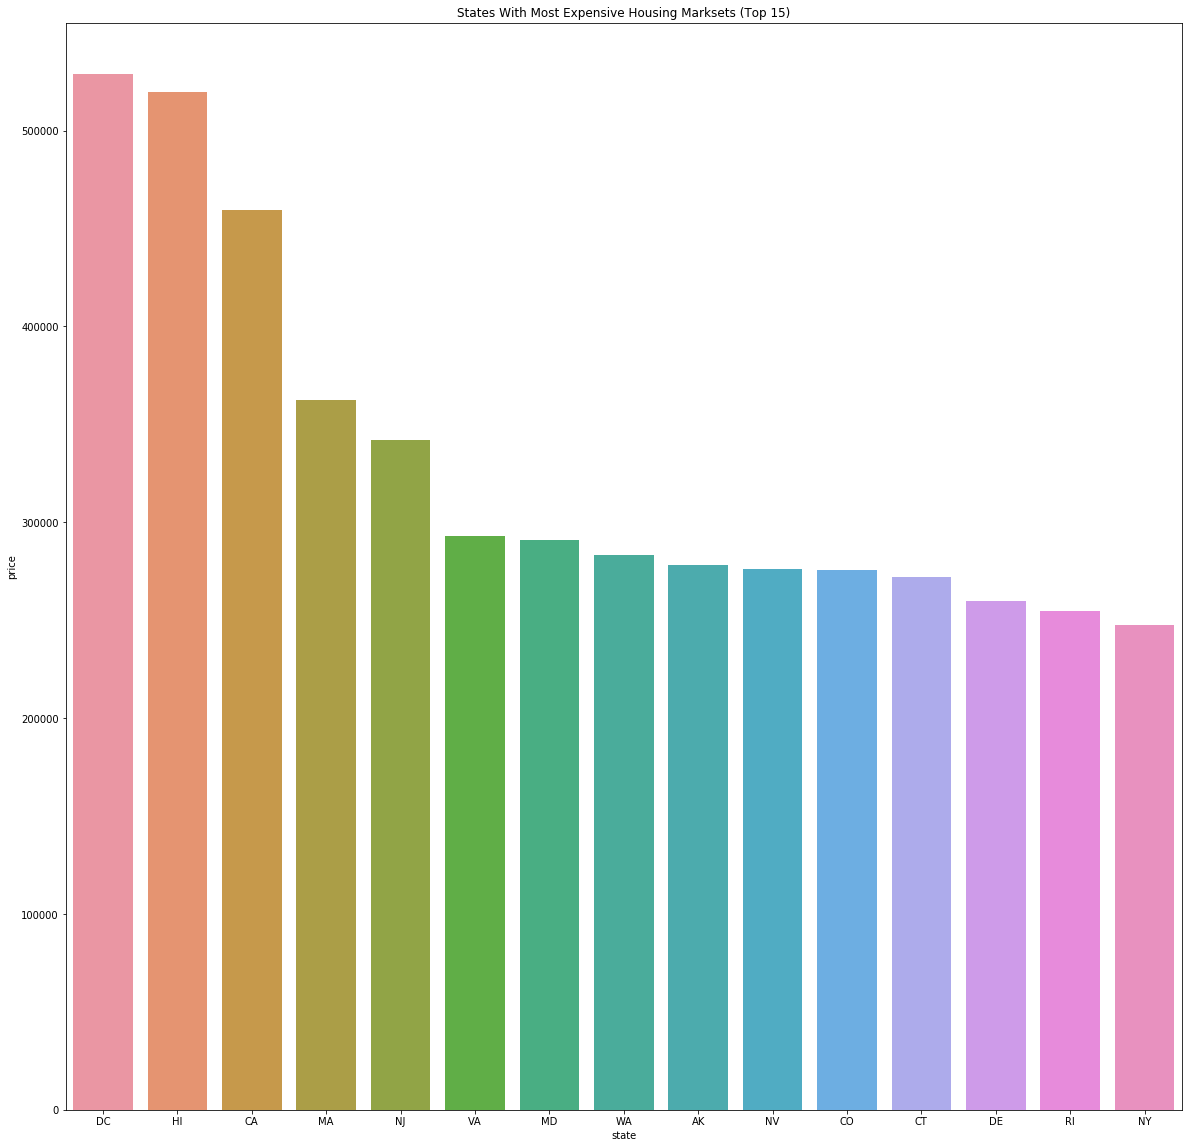

In [188]:
plt.figure(figsize=(20,20))
sns.barplot(x="state", y='price', data=top15State)
plt.title('States With Most Expensive Housing Marksets (Top 15)')
#sns.set(font_scale=5)  # crazy big

plt.show()

## Predicitve Modeling:
Earlier, we calculated our 5 best zipcodes to invest in. They were determined to be the following: 

                Zipcode : 55406 
                Location: Minneapolis, MN

                Zipcode : 55418 
                Location: Minneapolis, MN

                Zipcode : 29412 
                Location: Charleston, SC

                Zipcode : 55104 
                Location: Saint Paul, MN

                Zipcode : 63108 
                Location: Saint Louis, MO


Now we will attempt to use Time Series Analysis to determine which of these five zipcodes is the best to invest in. 


right off the bat - i notice some problems. First, I keep getting a few warnings due to the sheer wide dimension of the data. I am going to try to resolve first. 

In [40]:
#first lets review out Top5 dt: 
bestZips.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2019-09,2019-10,2019-11,2019-12,2020-01,yr_avg,ROI,std,mean,CV
1699,55406,81865.0,81943.0,82378.0,82752.0,83235.0,83555.0,83931.0,84235.0,84579.0,...,279360,280237,281301,282087,282446,279021.666667,2.0763,47764.94,186729.42,0.2558
2667,55418,84262.0,84276.0,84482.0,84728.0,85034.0,85320.0,85658.0,85985.0,86327.0,...,280893,281764,283142,284222,284920,279880.166667,1.9857,45682.79,182902.62,0.2498
1166,29412,110221.0,111189.0,112180.0,112955.0,113867.0,114411.0,114994.0,115398.0,116263.0,...,346605,346527,346774,347215,348214,346755.333333,1.8807,60637.32,236703.78,0.2562
1025,55104,81970.0,81748.0,81530.0,81449.0,81569.0,81826.0,82098.0,82307.0,82563.0,...,252324,253198,253352,253305,253333,250224.250000,1.8205,42476.71,175283.34,0.2423
2961,63108,128297.0,126478.0,125878.0,125923.0,125940.0,125522.0,125272.0,125832.0,126405.0,...,376732,378050,378694,380234,382602,376496.916667,1.8029,69463.21,290602.86,0.2390


In [41]:
#Lets make a function: 
#Get Dates from the column values 
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')
#Convert the data into long format. -
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

#remove yr_avg','std','mean','ROI','CV' in new d
zip5_TSA = bestZips.drop(['yr_avg','std','mean','ROI','CV'],axis=1)
zip5_TSA = melt_data(zip5_TSA).set_index('time')
print('5 Top ZipCodes - By timeseries data \n',zip5_TSA.head())

5 Top ZipCodes - By timeseries data 
             RegionName     value
time                            
1996-04-01       55406   81865.0
1996-04-01       55418   84262.0
1996-04-01       29412  110221.0
1996-04-01       55104   81970.0
1996-04-01       63108  128297.0


In [42]:
#now lets make a separate list for each of the 5 zipcodes.
#Use this to make 5  different df for the time series of each zipcode 
#with frequency by year-month

df_TSA = []
for zc in zip5_TSA.RegionName.unique():
    df = zip5_TSA[zip5_TSA['RegionName']==zc].asfreq('MS')
    df_TSA.append(df)

In [43]:
print('\n time series table for 55406 zipcode:')
df_TSA[0].head()


 time series table for 55406 zipcode:


,RegionName,value
time,,
1996-04-01,55406,81865.0
1996-05-01,55406,81943.0
1996-06-01,55406,82378.0
1996-07-01,55406,82752.0
1996-08-01,55406,83235.0


In [44]:
for i in range(len(df_TSA)):
    print(f'Value descriptive statistics for zipcode {df_TSA[i].RegionName[0]}:')
    print(f'{df_TSA[i].value.describe()}\n')

Value descriptive statistics for zipcode 55406:
count       286.000000
mean     187650.895105
std       53191.516409
min       81865.000000
25%      161529.750000
50%      195748.500000
75%      224619.000000
max      282446.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 55418:
count       286.000000
mean     184209.622378
std       51487.651128
min       84262.000000
25%      156150.250000
50%      188982.000000
75%      219055.750000
max      284920.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 29412:
count       286.000000
mean     237826.867133
std       66507.531866
min      110221.000000
25%      187064.250000
50%      241164.500000
75%      292183.500000
max      348214.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 55104:
count       286.000000
mean     175737.409091
std       46847.831207
min       81449.000000
25%      157505.750000
50%      186844.500000
75%      209778.500000
max     

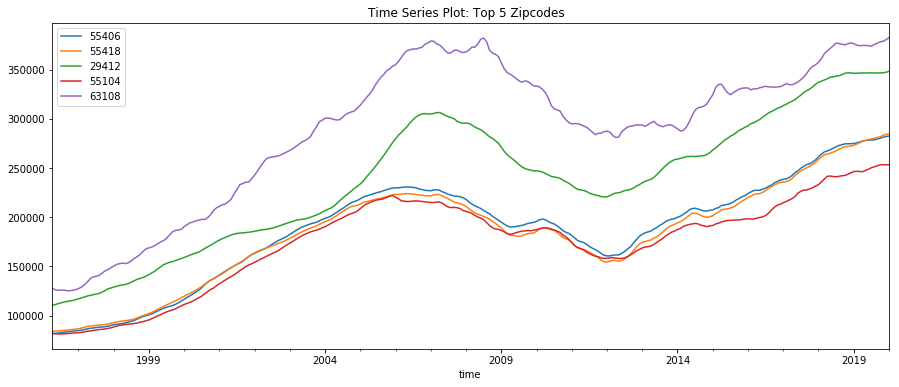

In [45]:
for i in range(5):
    df_TSA[i].value.plot(label=df_TSA[i].RegionName[0],figsize=(15,6))
    plt.title('Time Series Plot: Top 5 Zipcodes  ')
    plt.legend()

In [46]:
#What can we expect as returns per month on our investmenmt? 
#reate new column that calculates returns for each zipcode
for zp in range(len(df_TSA)):
    df_TSA[zp]['ret']=np.nan*len(df_TSA[zp])
    for i in range(len(df_TSA[zp])-1):
        df_TSA[zp]['ret'][i+1]= (df_TSA[zp].value.iloc[i+1] / df_TSA[zp].value.iloc[i]) - 1
        

C:\Users\parin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


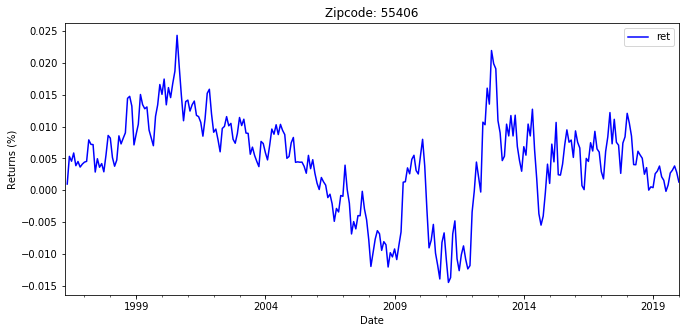

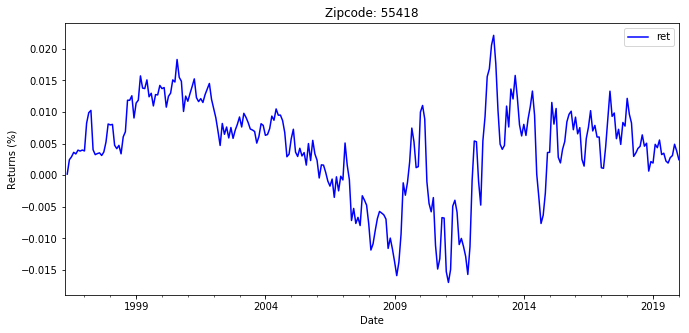

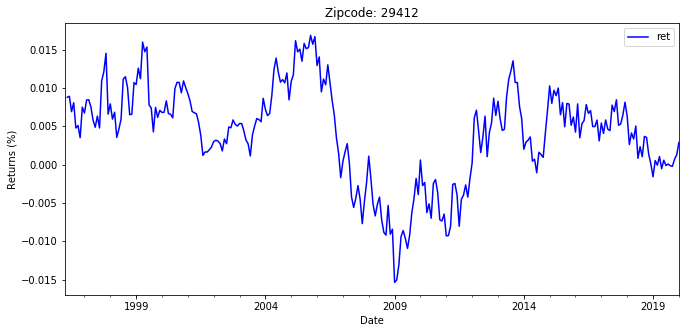

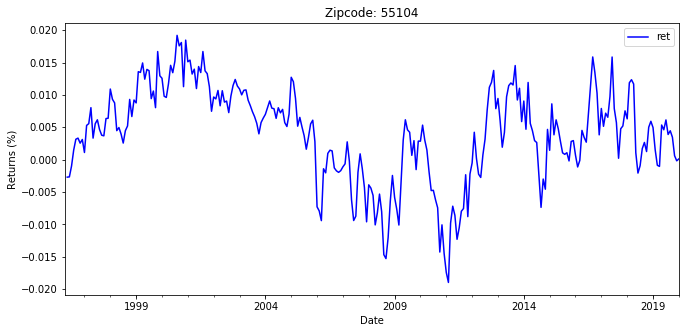

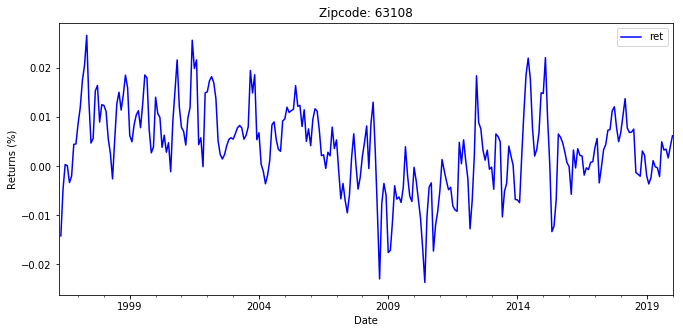

In [47]:
#Plot
for i in range(len(df_TSA)):
    df_TSA[i].ret.plot(figsize=(11,5), color = 'b')
    plt.title(f'Zipcode: {df_TSA[i].RegionName[0]}')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend(loc='best')
    plt.show()

## Zipcode : 55406 
### Arima Modeling: ACF and PACF 
           Location: Minneapolis, MN

##### ACF ( complete auto-correlation function ) / PACF (is a partial auto-correlation function.)

- ACF describes how well the present value of the time series is related with its past values. Presents correlations of present with lag values. 
- PACF describes the corelation of the residuals with the next lag value. Helps us to understand if there is any hidden information in the redicual which can be modeled in the next lag. 

We will use ACR and PACF to identify lag values that are in the ARMA mode.


In [48]:
import pmdarima as pm

In [148]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt  # plotting series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import ARMA as arma
from datetime import datetime
from numpy import round
from numpy import nan
import numpy as np
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima_model import ARIMA as arima
from statsmodels.tsa.arima_model import ARIMAResults as arima_results
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from sklearn.metrics import mean_squared_error as MSE


C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


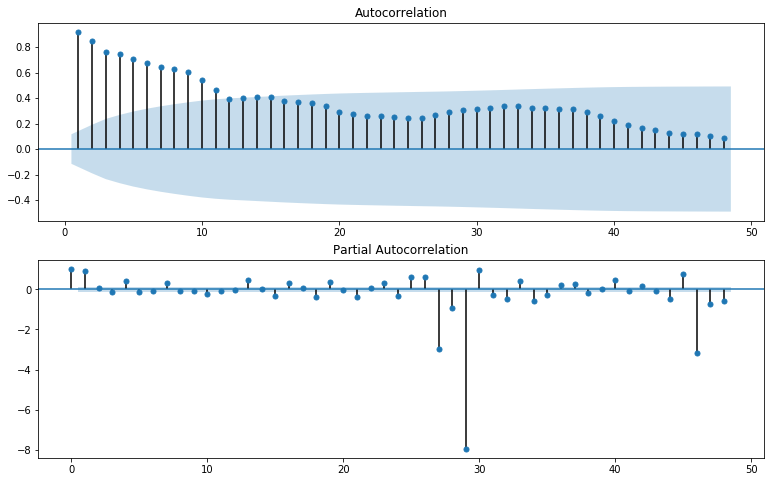

In [149]:

# separate time series for each of the zipcodes.
def acf_pacf(df,alags=48,plags=48):
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(13,8))
    #Make ACF plot
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

#Zipcode 55406 

TS_55406= df_TSA[0].ret.dropna()
acf_pacf(TS_55406)


We limit the number of lags on the x-axis to 50 to make the plot easier to read. We can see from the plot that the ACF plot is  tailing off towards the end. And that the PACF shows a single major spike at around 28 lag. Since the ACF plot is tailing off - there is a chance it will end up with AR and MA parameters in the final mode. 




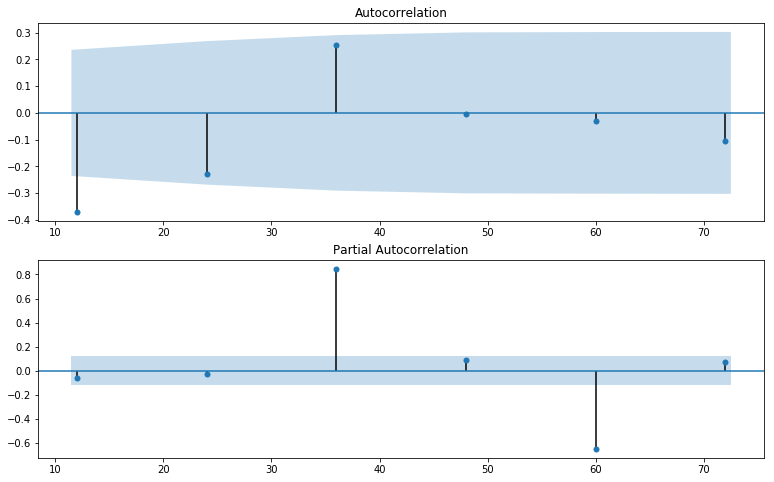

In [150]:
def seasonal_plots(df,N=13,lags=[12,24,36,48,60,72]):
    #finding seasonality in acf Plot 
    # by differencing the rolling mean 
    
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(13,8))
    rolling = TS_55406 - TS_55406.rolling(N).mean()
    plot_acf(rolling.dropna(),lags=lags,ax=ax1)
    plot_pacf(rolling.dropna(),lags=lags,ax=ax2)
    plt.show();
    

seasonal_plots(TS_55406, N=13)

When looking at the ACF plot we can see at statistically signifigant peak in the plot around lag 12. This is not seen in the other lags of the ACF plot so it is likely that there is no seasonality to this. Hoowever, we can use the SARIMA model to get a better understanding. 

In [151]:
#Use ACF 
#to find the best non-seasonal and seasonal parameters. 



results = pm.auto_arima(TS_55406,information_criterion='aic',m=12,d=0,
                        start_p=1,start_q=1, max_p=3, max_q=3,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results


Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(1, 0, 1, 12) (constant=True); AIC=-2610.736, BIC=-2588.821, Time=1.009 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=True); AIC=-1985.780, BIC=-1978.475, Time=0.053 seconds
Fit ARIMA: (1, 0, 0)x(1, 0, 0, 12) (constant=True); AIC=-2581.872, BIC=-2567.262, Time=0.822 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 1, 12) (constant=True); AIC=-2211.763, BIC=-2197.153, Time=0.692 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 12) (constant=False); AIC=-1901.595, BIC=-1897.942, Time=0.024 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 1, 12) (constant=True); AIC=-2611.763, BIC=-2593.501, Time=0.777 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 12) (constant=True); AIC=-2512.077, BIC=-2497.467, Time=0.063 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 2, 12) (constant=True); AIC=-2611.641, BIC=-2589.726, Time=2.239 seconds
Fit ARIMA: (1, 0, 1)x(1, 0, 0, 12) (constant=True); AIC=-2580.426, BIC=-2562.164, Time=0.788 seconds
Fit ARIMA: (1, 0, 1)x(1, 0, 2, 12) (constant=Tr

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

##### based on the results from above - we can see that we got the following parameters:   

I got the following parameters for the SARIMA model:
p = 2, q = 2
P = 0, Q = 2


C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                                ret   No. Observations:                  249
Model:             SARIMAX(2, 0, 2)x(0, 0, 2, 12)   Log Likelihood                1202.657
Date:                            Sun, 23 Feb 2020   AIC                          -2391.314
Time:                                    18:50:54   BIC                          -2366.691
Sample:                                05-01-1996   HQIC                         -2381.403
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1620      0.057      2.819      0.005       0.049       0.275
ar.L2          0.8110      0.056   

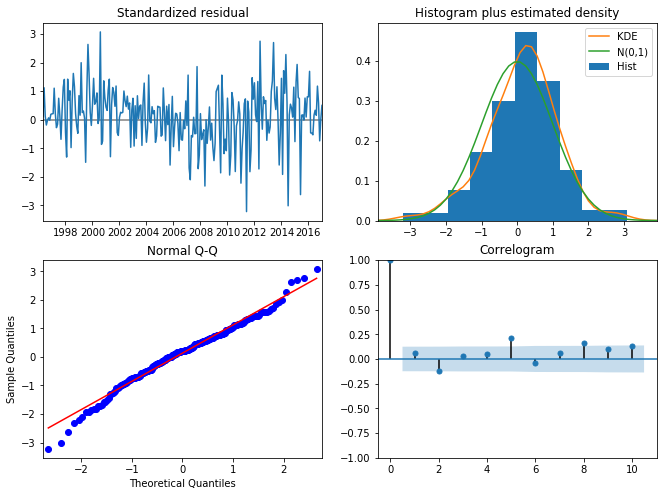

In [155]:
#Fit  SARIMA model based on parameters 

#first define train and test data 
def train_test(df):
    #Set training data before 2017
    train = df[:'2017-01']
    #Set test data after  2017
    test = df['2017-01':]
    return train, test

#define function for model fit and to get the results of the train test function
def model_fit(df,pdq=(2,0,2),pdqs=(0,0,2,12)):
    train, test = train_test(df)
    model = SARIMAX(train,order=pdq,seasonal_order=pdqs)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return train, test, results


pdq = (2, 0, 2)
pdqs = (0, 0, 2, 12)
train, test, results = model_fit(TS_55406,pdq=pdq,pdqs=pdqs)

The fitted, seasonal ARIMA model fitted seems to capture most of the signal from the monthly returns. 

Our results show that first, the residuals are normally distributed (can see this in the Q-Q plot and the histogram). There is also a lot of background noise in the residual plot. 

We can see that the Ljung-Box Test hass a p-value of 0. Sine this is less than 5%, we can reject the null hypothesis in favor of the alternative that the residals are autocorrelated.  



In [156]:
#Lets try to understand how much of this model is noise...
#RMSE of training of model is a metric which measure how much the signal and the noise is explained by the model
# In our case - we will perform a goodness of fit test by calculating the RMSE on the train data and the test data.

#function we create for training data gft


def train_RMSE(train, results, display = True):
    train_pred = results.predict(-36)
    rmse = sqrt(MSE(train[-36:],train_pred))
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        train[-60:].plot(label='Actual',color='b')
        train_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Returns')
        plt.show()


               

SARIMA model RMSE on train data: 0.00209


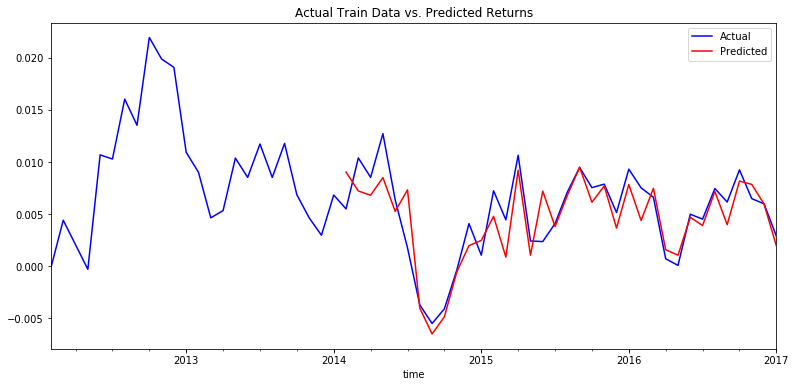

In [157]:
train_RMSE(train, results)

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

SARIMA model RMSE on test data: 0.00150


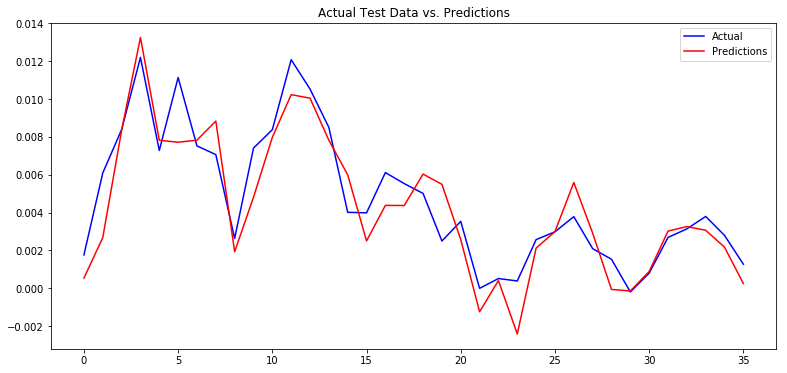

In [158]:
#function we create for testing data gft


def test_RMSE(df,pdq=(2,0,2),pdqs=(0,0,2,12), display=True):
    X = df.values
    train, test = X[:-36],X[-36:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = SARIMAX(history, order=pdq,seasonal_order=pdqs)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(MSE(test, predictions))
    print('SARIMA model RMSE on test data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        plt.title('Actual Test Data vs. Predictions')
        plt.plot(history[-36:],label='Actual', color='b')
        plt.plot(predictions,label='Predictions',color='r')
        plt.legend(loc='best')
        plt.show()




test_RMSE(TS_55406,pdq=pdq,pdqs=pdqs, display=True)

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


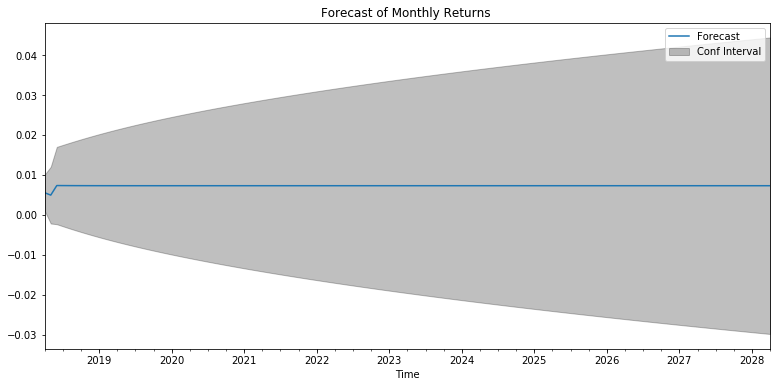

Total expected return in 1 year: 8.68%
Total expected return in 3 years: 29.38%
Total expected return in 5 year: 54.01%
Total expected return in 10 years: 139.85%


In [172]:
def forecast_model(df,pdq=(2,0,2),pdqs=(0,0,2,12), display=True,zc='input zipcode'):
    model = SARIMAX(df, order=pdq,seasonal_order=pdqs)
    model_fit = model.fit()
    output = model_fit.get_prediction(start='2018-04',end='2028-04', dynamic=True)
    forecast_ci = output.conf_int()
    if display:
        fig, ax = plt.subplots(figsize=(13,6))
        output.predicted_mean.plot(label='Forecast')
        ax.fill_between(forecast_ci.index,forecast_ci.iloc[:, 0],forecast_ci.iloc[:, 1],
                        color='k', alpha=.25,label='Conf Interval')
        plt.title('Forecast of Monthly Returns ')
        plt.xlabel('Time')
        plt.legend(loc='best')
        plt.show()
    year_1= (1+output.predicted_mean[:12]).prod()-1
    year_3=(1+output.predicted_mean[:36]).prod()-1
    year_5= (1+output.predicted_mean[:60]).prod()-1
    year_10=(1+output.predicted_mean).prod()-1
    print(f'Total expected return in 1 year: {round(year_1*100,2)}%')
    print(f'Total expected return in 3 years: {round(year_3*100,2)}%')
    print(f'Total expected return in 5 year: {round(year_5*100,2)}%')
    print(f'Total expected return in 10 years: {round(year_10*100,2)}%')
    tot_ret = [zc,year_1,year_3,year_5,year_10]
    return tot_ret

#trying some forcasting - for 55406
ret_55406 = forecast_model(TS_55406,pdq=pdq,pdqs=pdqs,zc=55406)


------------------------------------------------------------------------------------------------------------------------
## Zipcode : 55418  
### Arima Modeling: ACF and PACF 
           Location: Minneapolis, MN

In [95]:
#Zipcode 55418 
TS_55418 = df_TSA[1].ret.dropna()
TS_55418d = df_TSA[1].ret.diff().dropna()#differenced time series

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


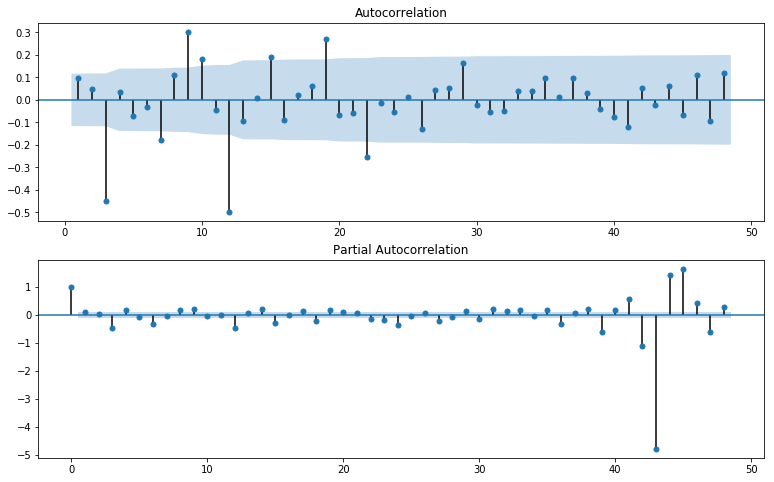

In [96]:
acf_pacf(TS_55418d)


Based on the results of the ACF and PACF plots we can see that that the ACF is tailing off while the PACF spiked at about 43, and then started to tail off again. It is likely that we will have the AR and MA parameters in the final model.  


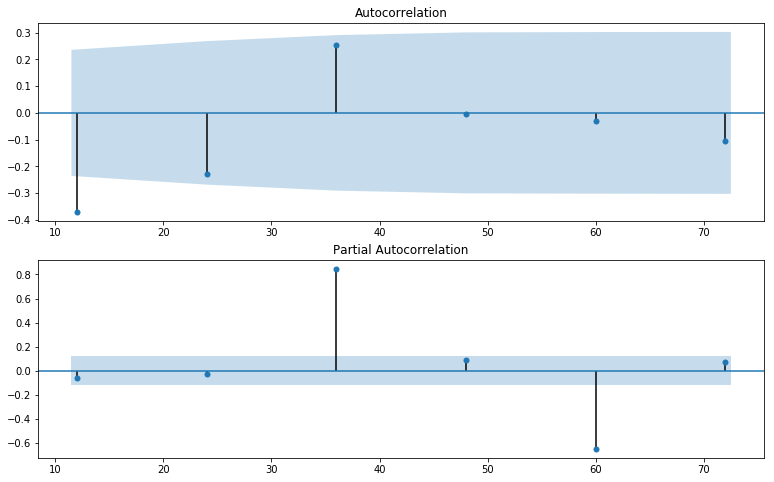

In [97]:
seasonal_plots(TS_55418d, N=13)


In these ACF Adn PACF graphs we can see that again there is a statistically significant autocorrelation on lag 12 in the ACF plot. Since this is again not repeated afterwards, there may not be seasonality in the data.

In [163]:
#Use ACF 
#to find the best non-seasonal and seasonal parameters. 

results = pm.auto_arima(TS_55418,information_criterion='aic',d=1,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2523.065, BIC=-2501.171, Time=0.264 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2473.836, BIC=-2466.539, Time=0.052 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2474.458, BIC=-2463.511, Time=0.038 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2474.091, BIC=-2463.144, Time=0.147 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-2475.833, BIC=-2472.184, Time=0.017 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2544.839, BIC=-2526.594, Time=0.470 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2493.793, BIC=-2479.197, Time=0.451 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2472.304, BIC=-2457.708, Time=0.138 seconds
Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=-2574.879, BIC=-2552.985, Time=0.404 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=-

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

##### based on the results from above - we can see that we got the following parameters:   

I got the following parameters for the SARIMA model:
p = 1, q = 4
P = 0, Q = 0

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  249
Model:               SARIMAX(1, 1, 4)   Log Likelihood                1114.766
Date:                Sun, 23 Feb 2020   AIC                          -2217.531
Time:                        18:58:29   BIC                          -2196.451
Sample:                    05-01-1996   HQIC                         -2209.045
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5764      0.452      1.276      0.202      -0.309       1.462
ma.L1         -0.4354      0.441     -0.987      0.324      -1.300       0.429
ma.L2          0.0543      0.103      0.527      0.5

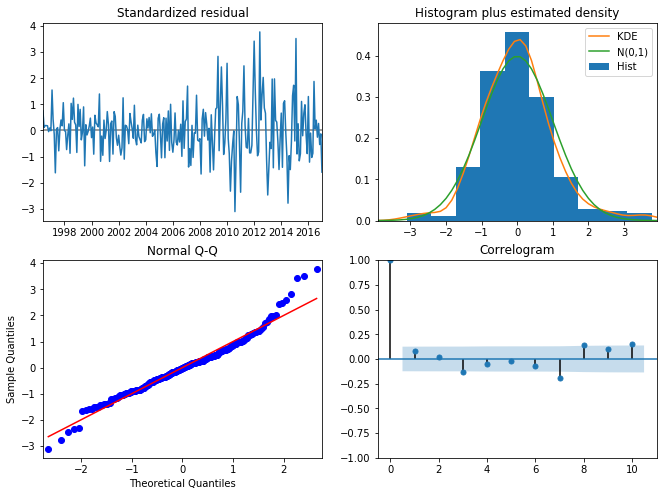

In [164]:

#Fit the SARIMA model and get results.
pdq = (1, 1, 4)
pdqs = (0, 0, 0, 0)
train, test, results = model_fit(TS_55418,pdq=pdq,pdqs=pdqs)

We can see that after fitting this model, from our above results ,this is a very good fitted model. We expect to have good predicted returns later. The residuals are definately not distributed normally and are autocorrelatd. We can se this by the very low p-values of the Ljung-Box and Jarque-Bera tests. Both tests resulted in a probability of 0.00. 


SARIMA model RMSE on train data: 0.00325


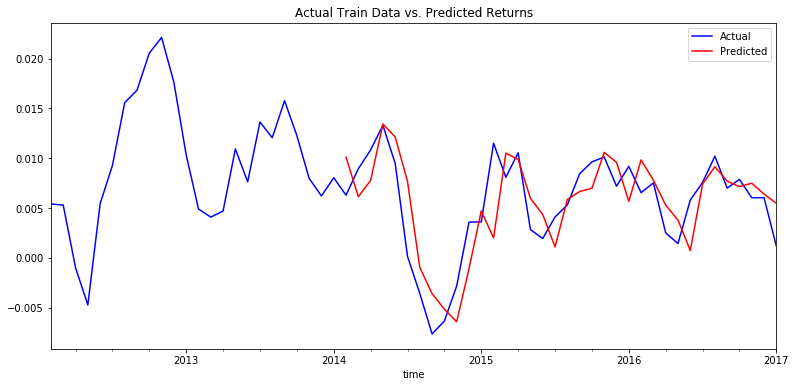

In [165]:
train_RMSE(train, results)

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

SARIMA model RMSE on test data: 0.00178


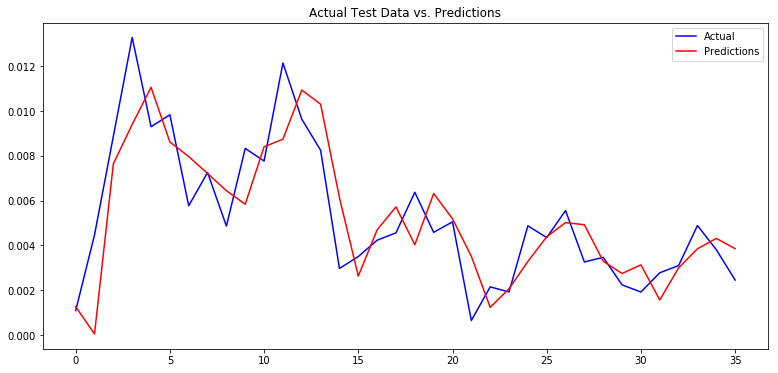

In [166]:
test_RMSE(TS_55418,pdq=pdq,pdqs=pdqs, display=True)

We can see a very low RMSE value on the test data than the training data. From the plot we see that the predictors are definately not identical to the actual test data, however it follows the trend - which is good news! 

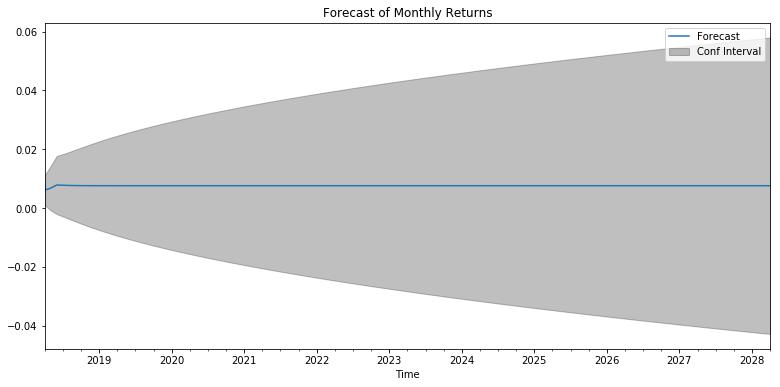

Total expected return in 1 year: 9.33%
Total expected return in 3 years: 31.13%
Total expected return in 5 year: 57.27%
Total expected return in 10 years: 149.65%


In [167]:
ret_55418  =forecast_model(TS_55418,pdq=pdq,pdqs=pdqs,zc=55418 ) 

## Zipcode : 29412  
### Arima Modeling: ACF and PACF 
           Location:  Charleston, SC


In [168]:
TS_29412 = df_TSA[2].ret.dropna()#Zipcode 29412 
TS_29412d = df_TSA[2].ret.diff().dropna()#differenced time series

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


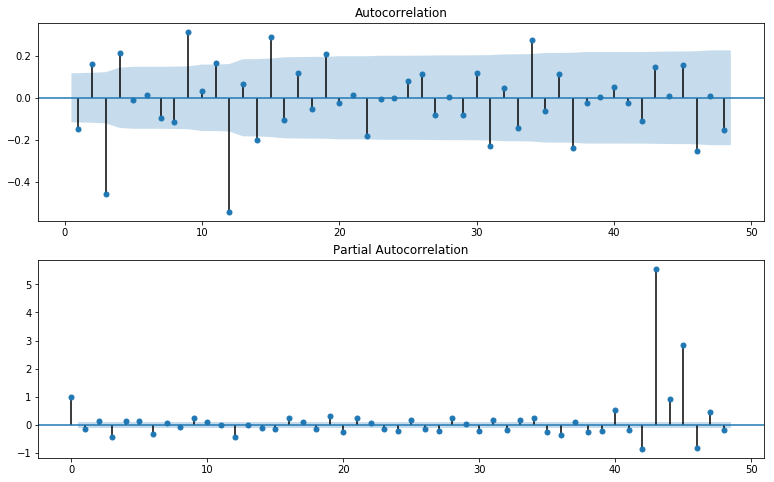

In [110]:
acf_pacf(TS_29412d)


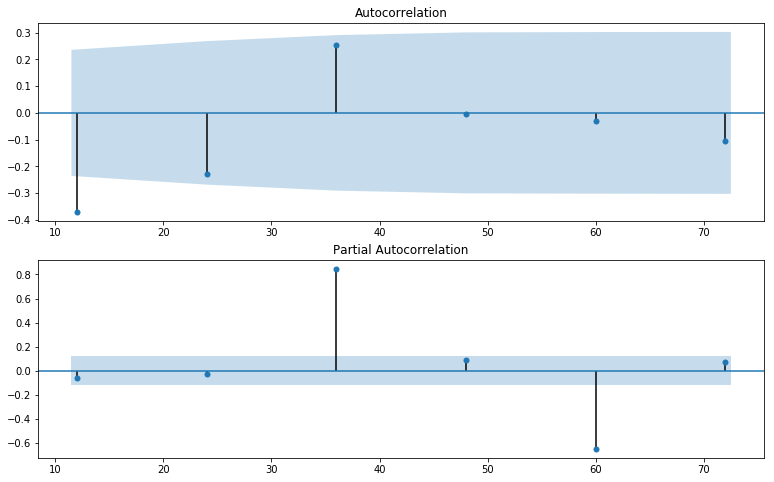

In [113]:
seasonal_plots(TS_29412d, N=13)

In [122]:
#Use ARF 
#to find the best non-seasonal and seasonal parameters. 
results = pm.auto_arima(TS_29412,information_criterion='aic',d=1,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2708.674, BIC=-2686.781, Time=0.573 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2646.559, BIC=-2639.261, Time=0.051 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2650.899, BIC=-2639.952, Time=0.138 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2648.569, BIC=-2637.623, Time=0.106 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-2648.533, BIC=-2644.884, Time=0.037 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2707.341, BIC=-2689.096, Time=0.591 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2640.556, BIC=-2622.311, Time=0.188 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2727.769, BIC=-2702.227, Time=0.593 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2710.285, BIC=-2688.391, Time=0.152 seconds
Fit ARIMA: (4, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 4), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

##### based on the results from above - we can see that we got the following parameters:   

I got the following parameters for the SARIMA model:
p = 0, q = 4
P = 0, Q = 0

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  249
Model:               SARIMAX(0, 1, 4)   Log Likelihood                1193.822
Date:                Sun, 23 Feb 2020   AIC                          -2377.643
Time:                        18:34:50   BIC                          -2360.076
Sample:                    05-01-1996   HQIC                         -2370.571
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0598      0.070      0.849      0.396      -0.078       0.198
ma.L2          0.1440      0.063      2.281      0.023       0.020       0.268
ma.L3         -0.4815      0.062     -7.723      0.0

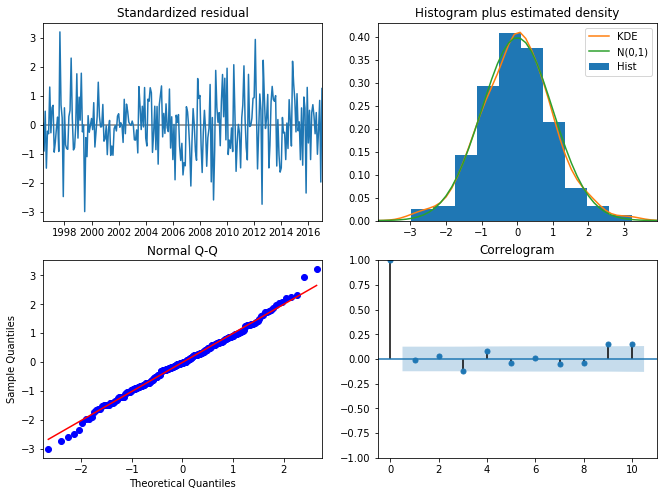

In [123]:
#Fit the SARIMA model and get results.
pdq = (0, 1, 4)
pdqs = (0,0,0,0)
train, test, results = model_fit(TS_29412,pdq=pdq,pdqs=pdqs)

SARIMA model RMSE on train data: 0.00193


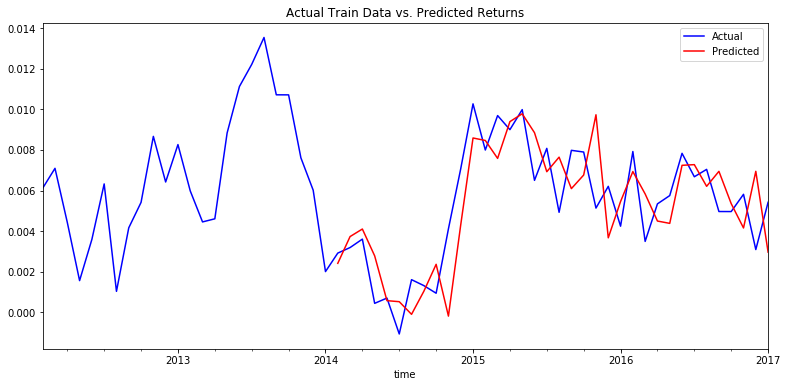

In [124]:
train_RMSE(train, results)

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

SARIMA model RMSE on test data: 0.00130


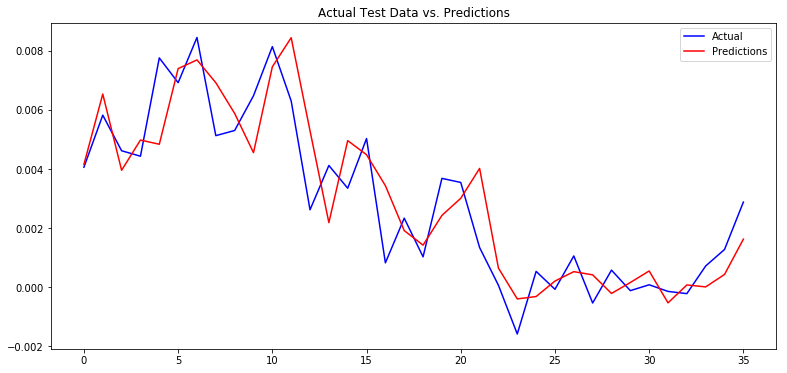

In [125]:
test_RMSE(TS_29412,pdq=pdq,pdqs=pdqs, display=True)


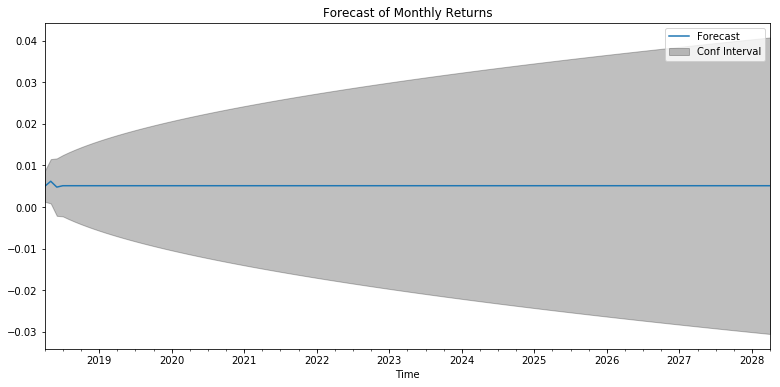

Total expected return in 1 year: 6.37%
Total expected return in 3 years: 20.21%
Total expected return in 5 year: 35.85%
Total expected return in 10 years: 85.38%


In [126]:
ret_29412 =forecast_model(TS_29412,pdq=pdq,pdqs=pdqs,zc=29412 )


## Zipcode : 55104  
### Arima Modeling: ACF and PACF 
           Location: Saint Paul, MN

In [127]:
TS_55104= df_TSA[3].ret.dropna()#Zipcode 55104


C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


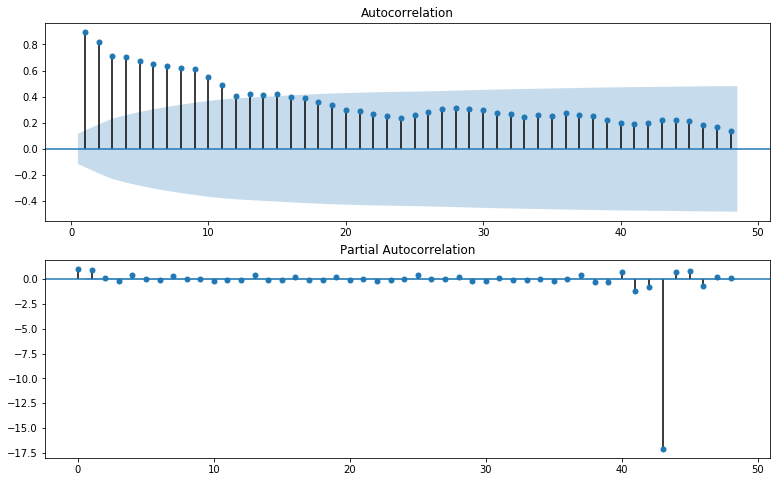

In [128]:
acf_pacf(TS_55104)


We can see from the plots that the ACF is tailing off - and therefore, we are quite confident that the MA(q) parameter is 0. We can also expect there to be a statistically significant values in the PACF after lag 43 wich might entail a full ARMA model with p and q parameters.

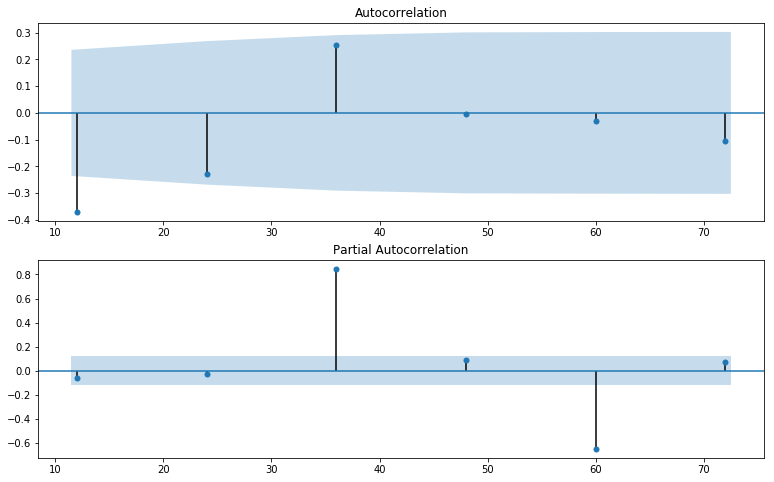

In [129]:
seasonal_plots(TS_55104, N=13)


Initially, we would expect a 12-month seasonality since we can see statistically significant peaks in the ACF plots at around lag 12. But since there is no repitiion in other lags, there is likely no seasonality in the results.

In [130]:
#Use ARF 
#to find the best non-seasonal and seasonal parameters. 
results = pm.auto_arima(TS_55104,information_criterion='aic',d=1,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2449.770, BIC=-2427.876, Time=0.374 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2442.536, BIC=-2435.238, Time=0.031 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2444.229, BIC=-2433.282, Time=0.077 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2443.794, BIC=-2432.847, Time=0.293 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-2444.532, BIC=-2440.883, Time=0.025 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2476.297, BIC=-2458.052, Time=0.642 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2442.151, BIC=-2427.555, Time=0.341 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2438.534, BIC=-2423.938, Time=0.264 seconds
Fit ARIMA: (1, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=-2546.647, BIC=-2524.753, Time=0.715 seconds
Fit ARIMA: (0, 1, 3)x(0, 0, 0, 0) (constant=True); AIC=-

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 4), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

##### based on the results from above - we can see that we got the following parameters:   

I got the following parameters for the SARIMA model:
p = 1, q = 4
P = 0, Q = 0

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  249
Model:               SARIMAX(1, 1, 4)   Log Likelihood                1107.420
Date:                Sun, 23 Feb 2020   AIC                          -2202.840
Time:                        18:40:13   BIC                          -2181.760
Sample:                    05-01-1996   HQIC                         -2194.354
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0100      0.494     -0.020      0.984      -0.978       0.958
ma.L1         -0.0499      0.509     -0.098      0.922      -1.048       0.948
ma.L2          0.0064      0.055      0.115      0.9

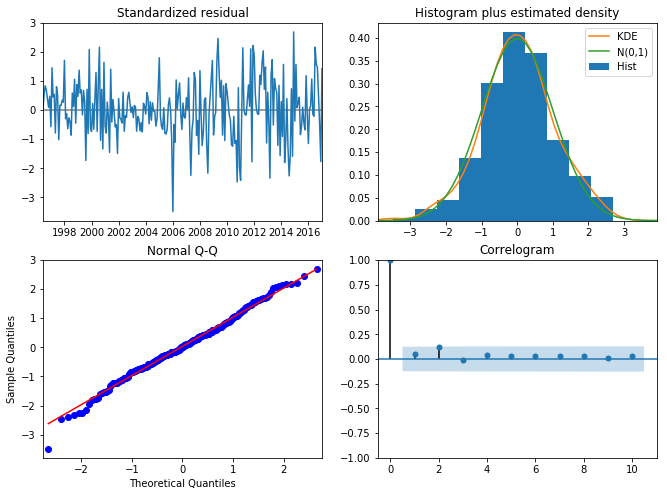

In [132]:
#Fit the SARIMA model based on above parameters .
pdq = (1, 1, 4)
pdqs = (0,0,0,0)
train, test, results = model_fit(TS_55104,pdq=pdq,pdqs=pdqs)

We can see that after fitting this model, from our above results ,this is a very good fitted model. We expect to have good predicted returns later. We can see from the histogram and Q-Q plot graphs above that the residuals are normally distributred. Based on the results of the Ljung-Box test, we can reject the null hypothesis in favor of the alternate hypothresis which shows that the data is autocorrelated at a 95% confidence level. 

SARIMA model RMSE on train data: 0.00329


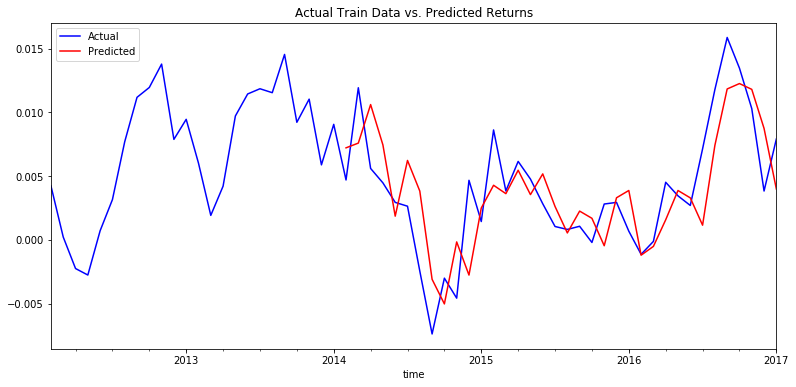

In [133]:
train_RMSE(train, results)

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum

SARIMA model RMSE on test data: 0.00284


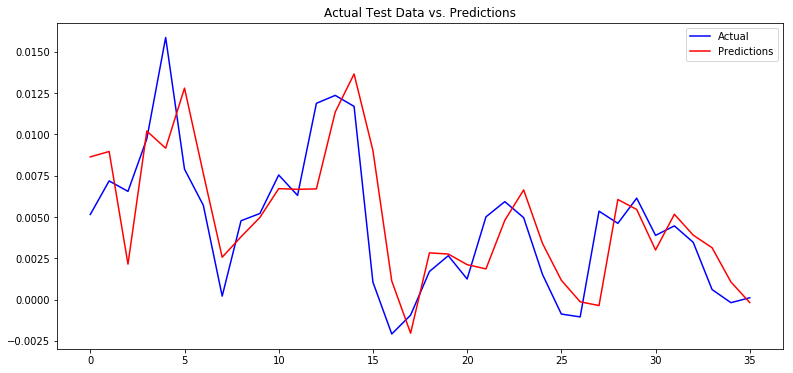

In [134]:
test_RMSE(TS_55104,pdq=pdq,pdqs=pdqs, display=True)

Interesting - That the RMSE test data has a barely smaller value than the train data. However, we can see from the plots that the prediction pattern closely follows that hof the actual data - which is good news for our return forecast

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


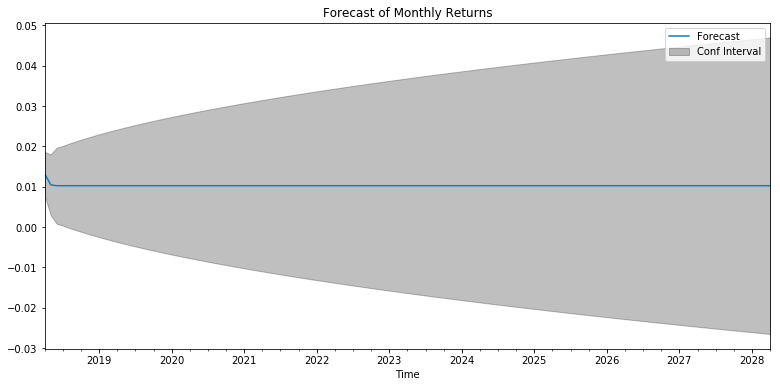

Total expected return in 1 year: 13.36%
Total expected return in 3 years: 44.77%
Total expected return in 5 year: 84.87%
Total expected return in 10 years: 244.19%


In [135]:
ret_55104 =forecast_model(TS_55104,pdq=pdq,pdqs=pdqs,zc=55104 )


## Zipcode : 63108  
### Arima Modeling: ACF and PACF 
           Location: Saint Louis, MO

In [136]:

TS_63108= df_TSA[4].ret.dropna()#Zipcode 63108 
TS_63108d = df_TSA[4].ret.diff().dropna()##differenced time series

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


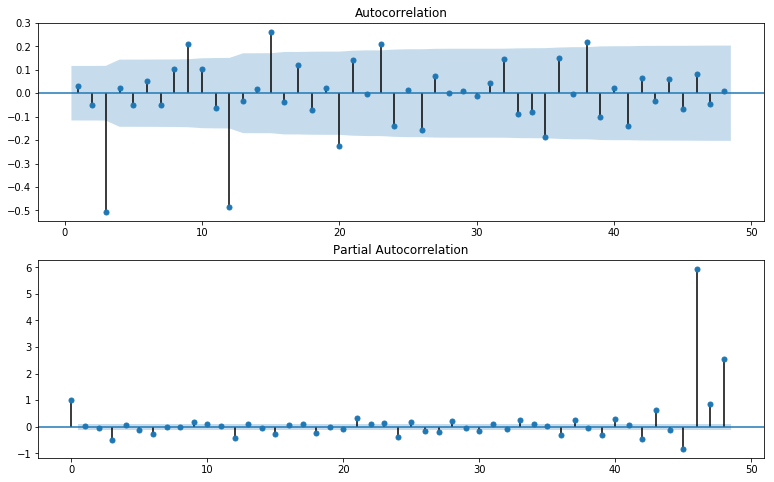

In [137]:
acf_pacf(TS_63108d)


There may be a 4-5 month seasonality given that there is a statistically significant peak in the ACF plot around lag 4-5. Because we can see another lag around 11, we can expect that there is seasonality in the results. 

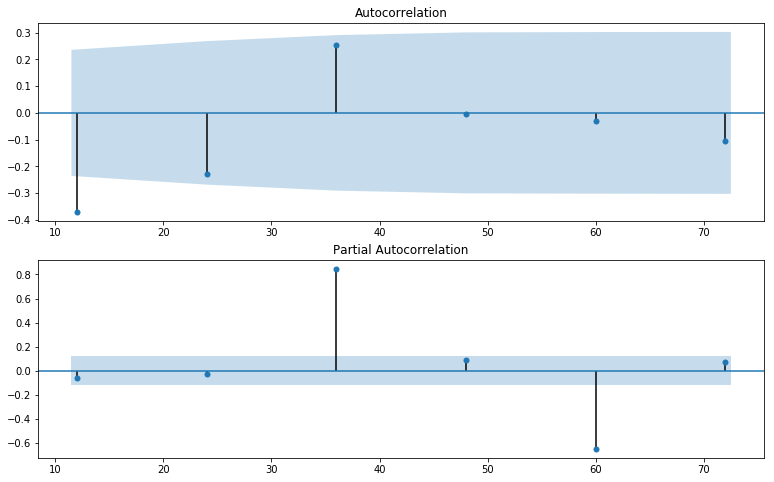

In [138]:
seasonal_plots(TS_63108d, N=13)


In [139]:
#Use ARF 
#to find the best non-seasonal and seasonal parameters. 
results = pm.auto_arima(TS_63108,information_criterion='aic',d=1,
                        stepwise=True,trace=True,error_action='ignore',suppress_warnings=True)
results

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2139.228, BIC=-2117.334, Time=0.814 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2134.446, BIC=-2127.148, Time=0.039 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2132.755, BIC=-2121.808, Time=0.104 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2132.511, BIC=-2121.564, Time=0.264 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-2136.399, BIC=-2132.750, Time=0.012 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2127.685, BIC=-2109.440, Time=0.341 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2129.192, BIC=-2110.947, Time=0.689 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2210.553, BIC=-2185.011, Time=0.122 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2210.899, BIC=-2189.005, Time=0.418 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

##### based on the results from above - we can see that we got the following parameters:   

I got the following parameters for the SARIMA model:
p = 3, q = 0
P = 0, Q = 0

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  249
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 961.900
Date:                Sun, 23 Feb 2020   AIC                          -1915.800
Time:                        18:45:17   BIC                          -1901.747
Sample:                    05-01-1996   HQIC                         -1910.143
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0136      0.051      0.267      0.790      -0.086       0.113
ar.L2         -0.0197      0.054     -0.362      0.717      -0.126       0.087
ar.L3         -0.5161      0.047    -10.895      0.0

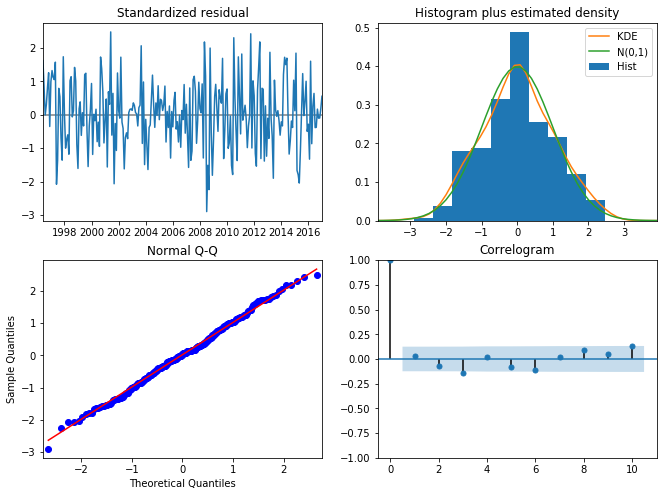

In [141]:
#Fit the SARIMA 
pdq = (3, 1, 0)
pdqs = (0,0,0,0)
train, test, results = model_fit(TS_63108,pdq=pdq,pdqs=pdqs)

The SARIMA model is able to capture the signal in the data. The residuals are somwhat normally distributed and therefore, they are not autocorrelated. The p-value for Jarque-Bera (JB) test is high, therefore the residuals are very likely just noise.

SARIMA model RMSE on train data: 0.00504


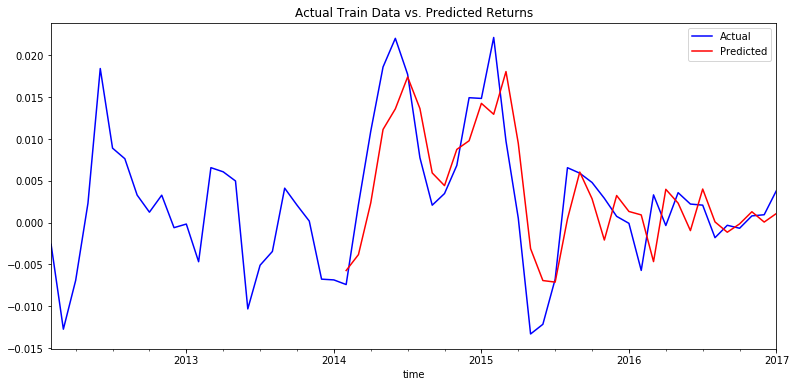

In [145]:
train_RMSE(train, results)

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

SARIMA model RMSE on test data: 0.00284


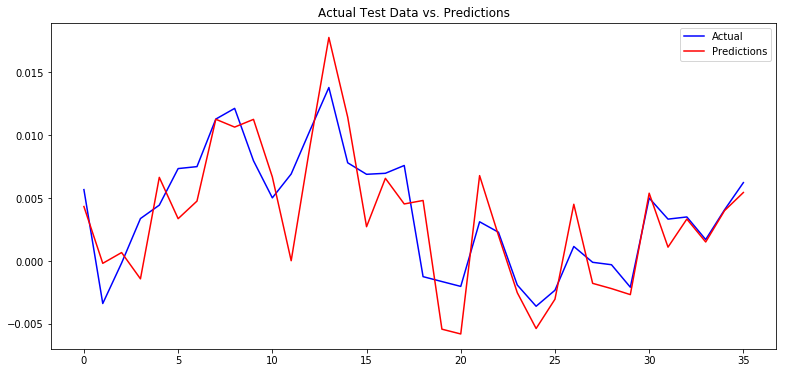

In [160]:
test_RMSE(TS_63108,pdq=pdq,pdqs=pdqs, display=True)


Testing data is smaller than training data. The trends of the prediction kind of follow the actual data. However, there is a clear different between a lot of points

C:\Users\parin\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


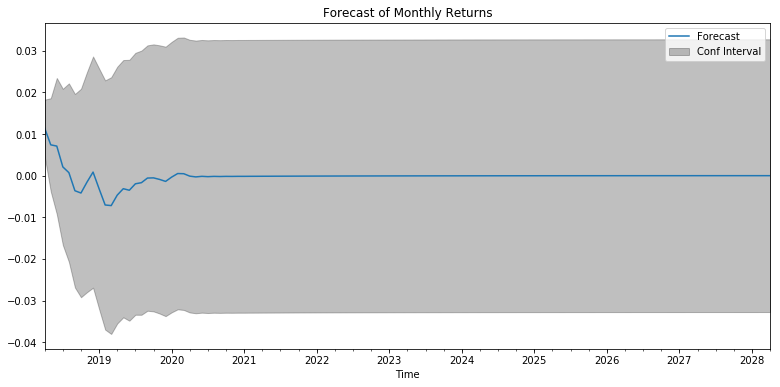

Total expected return in 1 year: 0.26%
Total expected return in 3 years: -1.73%
Total expected return in 5 year: -1.96%
Total expected return in 10 years: -2.1%


In [161]:
ret_63108 =forecast_model(TS_63108,pdq=pdq,pdqs=pdqs,zc=63108 )


# Summary and Findings

After performing time series analysis on the 5 zip codes and forecasting total returns for up to ten years, I reccomnd fo the company to invest in the following 3 zipcodes:

- 55104: Saint Paul, MN (244.19% 10-year total return)
- 55418: Minneapolis, MN (149.65% 10-year total return)
- 29412 : Charleston, SC (85.38% 10-year total return)
- 55406 : Minneapolis, MN (5.78% 10-year total return)


*63108 ( Saint Louis, MO) is not a good investment opportunity since since the total  return is negative. 


In [170]:
#Return in descending order. 
tot_returns = [ret_55406,ret_55418,ret_29412,ret_55104,ret_63108]
tot_returns = pd.DataFrame(tot_returns,columns=['Zip_code','1-year','3-year','5-year','10-year'])
tot_returns.sort_values('10-year',ascending=False)

,Zip_code,1-year,3-year,5-year,10-year
3,55104,0.133630,0.447682,0.848735,2.441941
1,55418,0.093338,0.311318,0.572750,1.496484
2,29412,0.063683,0.202077,0.358477,0.853812
0,55406,0.036458,0.037230,0.046333,0.057810
4,63108,0.002624,-0.017250,-0.019580,-0.020977


#### References: 

https://stats.stackexchange.com/questions/241914/terms-cut-off-and-tail-off-about-acf-pacf-functions
https://www.investopedia.com/ask/answers/031715/what-can-coefficient-variation-cov-tell-investors-about-investments-volatility.asp